In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the imputed csv output from 'Capstone_NHTSA_Imputations' python notebook which are free of null values.
comp = pd.read_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Complaints\complaints_imputed.csv", low_memory = True)

In [3]:
#changing all Y/N columns to 1 or 0 for  aggregation
comp['CRASH_IND'] =np.where(comp['CRASH'] == 'Y', 1, (np.where(comp['CRASH'] == 'N', 0, np.nan)))

In [4]:
a = ['FIRE','POLICE_RPT_YN','ORIG_OWNER_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN','MEDICAL_ATTN','VEHICLES_TOWED_YN']

for i in a:
    comp[i +'_IND'] = np.where(comp[i] == 'Y', 1, (np.where(comp[i] == 'N', 0, np.nan)))
    

In [5]:
for i in a:
    print(comp[i].value_counts(), comp[i+'_IND'].value_counts())

N    1158275
Y      25842
Name: FIRE, dtype: int64 0.0    1158275
1.0      25842
Name: FIRE_IND, dtype: int64
N    1147210
Y      36907
Name: POLICE_RPT_YN, dtype: int64 0.0    1147210
1.0      36907
Name: POLICE_RPT_YN_IND, dtype: int64
N    1167620
Y      15909
Name: ORIG_OWNER_YN, dtype: int64 0.0    1167620
1.0      15909
Name: ORIG_OWNER_YN_IND, dtype: int64
N    1164911
Y      18618
Name: ANTI_BRAKES_YN, dtype: int64 0.0    1164911
1.0      18618
Name: ANTI_BRAKES_YN_IND, dtype: int64
N    1164617
Y      18912
Name: CRUISE_CONT_YN, dtype: int64 0.0    1164617
1.0      18912
Name: CRUISE_CONT_YN_IND, dtype: int64
N    1163601
Y      20516
Name: MEDICAL_ATTN, dtype: int64 0.0    1163601
1.0      20516
Name: MEDICAL_ATTN_IND, dtype: int64
N    1136232
Y      47297
Name: VEHICLES_TOWED_YN, dtype: int64 0.0    1136232
1.0      47297
Name: VEHICLES_TOWED_YN_IND, dtype: int64


In [6]:
#discarding all invalid faildates
comp = comp[comp['FAILDATE'] > 9999999]

In [8]:
comp[comp['FAILDATE'] //1000000 ==10]

,CMPLID,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,...,MILES_NEW,OCCURRENCES_NEW,CRASH_IND,FIRE_IND,POLICE_RPT_YN_IND,ORIG_OWNER_YN_IND,ANTI_BRAKES_YN_IND,CRUISE_CONT_YN_IND,MEDICAL_ATTN_IND,VEHICLES_TOWED_YN_IND
361271,1231739,HONDA,CIVIC ...,2008.0,N,10150314,N,0,0,STRUCTURE:BODY ...,...,62137.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361720,1231870,TOYOTA,TACOMA ...,2009.0,N,10151024,N,0,0,ELECTRICAL SYSTEM ...,...,117000.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362034,1231951,HONDA,CIVIC ...,2008.0,N,10151025,N,0,0,STRUCTURE:BODY ...,...,80890.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363845,1227719,FORD,TAURUS ...,2002.0,N,10151010,N,0,0,FUEL/PROPULSION SYSTEM ...,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366722,1232890,HONDA,ODYSSEY ...,2014.0,N,10151027,N,0,0,SERVICE BRAKES ...,...,35000.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372641,1234433,FORD,FOCUS ...,2013.0,N,10151025,N,0,0,POWER TRAIN ...,...,48000.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372642,1234434,FORD,FOCUS ...,2013.0,N,10151025,N,0,0,UNKNOWN OR OTHER ...,...,48000.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374573,1229696,TOYOTA,TACOMA ...,1995.0,Y,10150909,N,0,0,STEERING ...,...,189852.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
375983,1239561,FORD,FUSION ...,2008.0,N,10151101,N,0,0,SERVICE BRAKES ...,...,72600.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381162,1248206,FORD,FREESTAR ...,2005.0,N,10151030,N,0,0,POWER TRAIN ...,...,54378.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
 comp[(comp['FAILDATE'] // 10000 <= 1980)]

,CMPLID,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,...,MILES_NEW,OCCURRENCES_NEW,CRASH_IND,FIRE_IND,POLICE_RPT_YN_IND,ORIG_OWNER_YN_IND,ANTI_BRAKES_YN_IND,CRUISE_CONT_YN_IND,MEDICAL_ATTN_IND,VEHICLES_TOWED_YN_IND
443,751193,DODGE,NEON ...,2003.0,N,19010101,N,0,0,STRUCTURE ...,...,86629.675557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,751207,HYUNDAI,SONATA ...,2007.0,N,19010101,N,0,0,EXTERIOR LIGHTING:BRAKE LIGHTS:SWITCH ...,...,45503.020264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,751208,HYUNDAI,SONATA ...,2007.0,N,19010101,N,0,0,AIR BAGS ...,...,45503.020264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
459,751212,CHEVROLET,COBALT ...,2005.0,N,19010101,N,0,0,STEERING:ELECTRIC POWER ASSIST SYSTEM ...,...,67994.208395,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,753306,CHRYSLER,CONCORDE ...,1996.0,N,19010101,N,1,0,EQUIPMENT:MECHANICAL:ACCESSORY SCISSOR/SCREW/B...,...,128837.505280,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066594,1946451,LEXUS,RX ...,2019.0,N,19750630,N,0,0,SERVICE BRAKES ...,...,57338.493635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1105917,1980903,FORD,TRANSIT CONNECT ...,2017.0,N,19670408,N,0,0,ELECTRICAL SYSTEM ...,...,86629.675557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157975,2024142,MINI,COUNTRYMAN ...,2025.0,N,19580326,N,0,0,SERVICE BRAKES ...,...,2401.315432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1175837,2041327,HONDA,RIDGELINE ...,2017.0,N,19690902,N,0,0,ENGINE ...,...,86629.675557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#discarding all complaints wich are registered before 1980
comp = comp[(comp['FAILDATE'] // 10000 >= 1980)]

In [9]:
#'FAILDATE' -'LDATE': Extract days from the dates and check the severity of complaint. If number of days are less, it could be an urgent issue and 
#if days are more, the complaint can be either a medium risk or less risk one. 
comp['TIME_TO_REPORT'] = (pd.to_datetime(comp['LDATE']) - pd.to_datetime(comp['FAILDATE'],format='%Y%m%d')).dt.days

In [10]:
comp['TIME_TO_REPORT'].max()

15467

In [11]:
comp['TIME_TO_REPORT'].describe()

count    1.183236e+06
mean     1.689137e+02
std      4.489834e+02
min     -3.660000e+02
25%      2.000000e+00
50%      1.600000e+01
75%      1.180000e+02
max      1.546700e+04
Name: TIME_TO_REPORT, dtype: float64

In [12]:
comp[(comp['TIME_TO_REPORT'] < 0)]

,CMPLID,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,...,OCCURRENCES_NEW,CRASH_IND,FIRE_IND,POLICE_RPT_YN_IND,ORIG_OWNER_YN_IND,ANTI_BRAKES_YN_IND,CRUISE_CONT_YN_IND,MEDICAL_ATTN_IND,VEHICLES_TOWED_YN_IND,TIME_TO_REPORT
388381,1257584,BUICK,LESABRE ...,2002.0,N,20161228,Y,0,0,ELECTRICAL SYSTEM ...,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-331
388382,1257585,BUICK,LESABRE ...,2002.0,N,20161228,Y,0,0,ENGINE ...,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-331
388383,1257586,BUICK,LESABRE ...,2002.0,N,20161228,Y,0,0,FUEL/PROPULSION SYSTEM ...,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-331
389672,1248933,TOYOTA,CAMRY ...,2009.0,Y,20161230,N,0,0,UNKNOWN OR OTHER ...,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-366
389673,1248934,TOYOTA,CAMRY ...,2009.0,Y,20161230,N,0,0,UNKNOWN OR OTHER ...,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-366
860015,1732697,HONDA,CR-V ...,2018.0,N,20210312,N,0,0,ELECTRICAL SYSTEM ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
860016,1732698,HONDA,CR-V ...,2018.0,N,20210312,N,0,0,ENGINE ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
868951,1744358,FORD,MUSTANG ...,2018.0,N,20210613,N,0,0,STRUCTURE:BODY ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-44
908883,1780145,JEEP,WRANGLER ...,2014.0,N,20211127,N,0,0,ENGINE ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
927644,1796623,HONDA,ACCORD ...,2019.0,N,20220222,N,0,0,ELECTRICAL SYSTEM ...,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [13]:
#taking absolute difference so that negative values are being nullified
comp['TIME_TO_REPORT'] = abs((pd.to_datetime(comp['LDATE']) - pd.to_datetime(comp['FAILDATE'],format='%Y%m%d')).dt.days)

In [14]:
comp[(comp['TIME_TO_REPORT'] < 0)]

,CMPLID,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,...,OCCURRENCES_NEW,CRASH_IND,FIRE_IND,POLICE_RPT_YN_IND,ORIG_OWNER_YN_IND,ANTI_BRAKES_YN_IND,CRUISE_CONT_YN_IND,MEDICAL_ATTN_IND,VEHICLES_TOWED_YN_IND,TIME_TO_REPORT


<Axes: xlabel='TIME_TO_REPORT', ylabel='Density'>

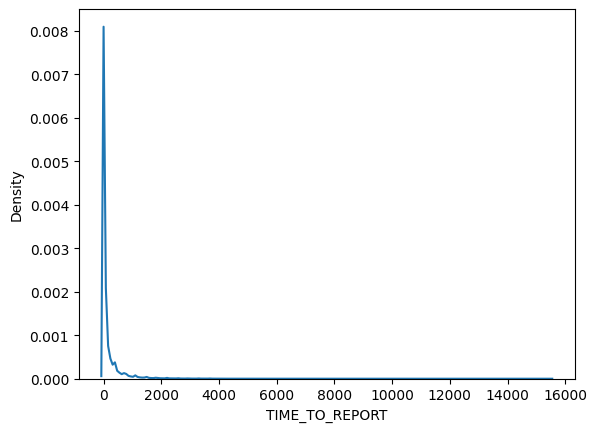

In [15]:
sns.kdeplot(comp['TIME_TO_REPORT'])

In [16]:
comp[(comp['TIME_TO_REPORT'] > 7000)]

,CMPLID,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,...,OCCURRENCES_NEW,CRASH_IND,FIRE_IND,POLICE_RPT_YN_IND,ORIG_OWNER_YN_IND,ANTI_BRAKES_YN_IND,CRUISE_CONT_YN_IND,MEDICAL_ATTN_IND,VEHICLES_TOWED_YN_IND,TIME_TO_REPORT
24185,776766,FORD,F-150 ...,2007.0,N,19870126,N,0,0,AIR BAGS:SIDE/WINDOW ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8459
34473,790016,SATURN,ION ...,2006.0,N,19830528,N,0,0,STEERING ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9862
39497,791712,CHEVROLET,IMPALA ...,2003.0,N,19840421,N,0,0,ELECTRICAL SYSTEM ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9544
40596,795499,FORD,F-250 ...,1995.0,N,19810626,Y,0,0,ENGINE AND ENGINE COOLING ...,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10592
55091,794894,NISSAN,MAXIMA ...,2006.0,N,19840622,N,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172921,2054918,JAYCO,MELBOURNE ...,2020.0,N,20030610,N,0,0,EQUIPMENT:RECREATIONAL VEHICLE/TRAILER ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7888
1172922,2054919,JAYCO,MELBOURNE ...,2020.0,N,20030610,N,0,0,UNKNOWN OR OTHER ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7888
1174965,2040894,FORD,EXPLORER ...,2015.0,N,20000601,N,0,0,BACK OVER PREVENTION ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8937
1177275,2042059,HONDA,CIVIC ...,2016.0,N,19911113,N,0,0,UNKNOWN OR OTHER ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12063


In [17]:
#99 percentile of time_to report is 2000 days.
comp['TIME_TO_REPORT'].quantile(0.99)

2197.0

In [18]:
comp['STATE'].unique()

array(['MD', 'WA', 'MO', 'PA', 'TX', 'VT', 'OH', 'KY', 'NJ', 'VA', 'AL',
       'NY', 'FL', 'IL', 'GA', 'CA', 'NC', 'MA', 'WI', 'IN', 'NV', 'MI',
       'IA', '0 ', 'ID', 'MN', 'KS', 'TN', 'NE', 'ME', 'NM', 'AR', 'MS',
       'CO', 'CT', 'FM', 'SC', 'OK', 'RI', 'HI', 'NH', 'DC', 'WY', 'AZ',
       'AE', 'WV', 'LA', 'OR', 'ND', 'UT', 'DE', 'MT', 'AK', 'PR', 'VI',
       'SD', 'PW', 'NN', 'AP', 'GU', 'MP', 'AA', 'MH', 'AS', 'UN', 'CD',
       '??'], dtype=object)

In [19]:
comp[comp['STATE']== '0 ']

,CMPLID,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,...,OCCURRENCES_NEW,CRASH_IND,FIRE_IND,POLICE_RPT_YN_IND,ORIG_OWNER_YN_IND,ANTI_BRAKES_YN_IND,CRUISE_CONT_YN_IND,MEDICAL_ATTN_IND,VEHICLES_TOWED_YN_IND,TIME_TO_REPORT
67,755190,NISSAN,PATHFINDER ...,2005.0,N,20100122,N,0,0,"FUEL SYSTEM, GASOLINE ...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
134,753210,JEEP,LIBERTY ...,2006.0,N,20090517,N,0,0,VISIBILITY ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248
194,755236,VOLKSWAGEN,PASSAT ...,2006.0,N,20100130,N,0,0,STEERING ...,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
420,752493,KIA,RONDO ...,2008.0,N,20100113,N,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
559,753866,HONDA,CR-V ...,2005.0,N,20100104,N,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020896,1891907,NISSAN,ROGUE ...,2016.0,Y,20230503,N,0,0,WHEELS ...,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1027101,1899622,HYUNDAI,SANTA FE ...,2020.0,N,20230606,N,0,0,TRAILER HITCHES ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1077382,1945796,SUBARU,IMPREZA ...,2018.0,N,20230812,N,0,0,EXTERIOR LIGHTING ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108
1147748,2012790,TOYOTA,RAV4 ...,2018.0,N,20240805,N,0,0,ELECTRICAL SYSTEM ...,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
#classifying state information to various regions of USA
regions = {
    "Northeast": ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA"],
    "Midwest": ["OH", "IN", "IL", "MI", "WI", "MN", "IA", "MO", "ND", "SD", "NE", "KS"],
    "South": ["DE", "MD", "DC", "VA", "WV", "NC", "SC", "GA", "FL", "KY", "TN", "MS", "AL", "TX", "OK", "AR", "LA"],
    "West": ["MT", "ID", "WY", "NV", "UT", "CO", "AZ", "NM", "WA", "OR", "CA", "AK", "HI"],
    "U.S. Territories": ["PR", "VI", "GU", "MP", "AS", "MH", "PW", "FM"]
}

In [21]:
for key,value in regions.items():
    print(key, value)

Northeast ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
Midwest ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
South ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'TX', 'OK', 'AR', 'LA']
West ['MT', 'ID', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM', 'WA', 'OR', 'CA', 'AK', 'HI']
U.S. Territories ['PR', 'VI', 'GU', 'MP', 'AS', 'MH', 'PW', 'FM']


In [22]:
#assigning new areas of states 
comp['NORTHEAST'] = np.where(comp['STATE'].isin(regions['Northeast']), 1, 0)
comp['MIDWEST'] = np.where(comp['STATE'].isin(regions['Midwest']), 1, 0)
comp['SOUTH'] = np.where(comp['STATE'].isin(regions['South']), 1, 0)
comp['WEST'] = np.where(comp['STATE'].isin(regions['West']), 1, 0)
comp['US_TERRITORIES'] = np.where(comp['STATE'].isin(regions['U.S. Territories']), 1, 0)

In [23]:
#Extracting Quarter information from every date reported and adding new columns 
comp['Q1_totalcompl'] = np.where(pd.to_datetime(comp['LDATE']).dt.quarter == 1, 1, 0)
comp['Q2_totalcompl'] = np.where(pd.to_datetime(comp['LDATE']).dt.quarter == 2, 1, 0)
comp['Q3_totalcompl'] = np.where(pd.to_datetime(comp['LDATE']).dt.quarter == 3, 1, 0)
comp['Q4_totalcompl'] = np.where(pd.to_datetime(comp['LDATE']).dt.quarter == 4, 1, 0)

In [24]:
comp['CMPL_TYPE'].value_counts()

IVOQ    897192
EVOQ    263922
LETR     11749
SVOQ      7989
CON       1035
VOQ        688
MIVQ       531
MAVQ       118
DP          11
CAG          1
Name: CMPL_TYPE, dtype: int64

In [25]:
#Pivoting CMPL_TYPE information to new columns
comp['IVOQ'] = np.where(comp['CMPL_TYPE'] == 'IVOQ',1,0)
comp['EVOQ'] = np.where(comp['CMPL_TYPE'] == 'EVOQ',1,0)
comp['LETR'] = np.where(comp['CMPL_TYPE'] == 'LETR',1,0)
comp['SVOQ'] = np.where(comp['CMPL_TYPE'] == 'SVOQ',1,0)
comp['CON'] = np.where(comp['CMPL_TYPE'] == 'CON',1,0)

In [26]:
comp['DRIVE_TRAIN'].value_counts()

FWD     60038
RWD     25932
4WD     19352
AWD     17470
U          13
Name: DRIVE_TRAIN, dtype: int64

In [27]:
#Pivoting DRIVE_TRAIN information to new columns
comp['FWD'] = np.where(comp['DRIVE_TRAIN'] == 'FWD',1,0)
comp['AWD'] = np.where(comp['DRIVE_TRAIN'] == 'AWD',1,0)
comp['RWD'] = np.where(comp['DRIVE_TRAIN'] == 'RWD',1,0)
comp['4WD'] = np.where(comp['DRIVE_TRAIN'] == '4WD',1,0)

In [28]:
comp['FUEL_TYPE'].value_counts()

GS      153877
BF        9445
DS        7606
HE        6999
CN          43
Name: FUEL_TYPE, dtype: int64

In [29]:
#Pivoting FUEL_TYPE information to new columns
comp['GAS'] = np.where(comp['FUEL_TYPE'] == 'GS',1,0)
comp['BIFUEL'] = np.where(comp['FUEL_TYPE'] == 'BF',1,0)
comp['DIESEL'] = np.where(comp['FUEL_TYPE'] == 'DS',1,0)
comp['HYBRID_ELECTRIC'] = np.where(comp['FUEL_TYPE'] == 'HE',1,0)

In [30]:
comp['PROD_TYPE'].value_counts()

V       1182650
E           295
C           244
T            47
Name: PROD_TYPE, dtype: int64

In [31]:
#Pivoting PROD_TYPE information to new columns
comp['Vehicle'] = np.where(comp['PROD_TYPE'] == 'V',1,0)
comp['EQUIPMENT'] = np.where(comp['PROD_TYPE'] == 'E',1,0)
comp['CHILD_RESTRAINT'] = np.where(comp['PROD_TYPE'] == 'C',1,0)
comp['TIRES'] = np.where(comp['PROD_TYPE'] == 'T',1,0)

In [ ]:
# agg_func = {'CMPLID' : 'count', 'CRASH', : 'sum', 'FAILDATE'- 'LDATE': 'median'
#        , 'FIRE': 'sum', 'INJURED': 'sum', 'DEATHS': 'sum', 'STATE',
#        , 'LDATE', 'CMPL_TYPE', 'POLICE_RPT_YN' : 'sum',
#        'ORIG_OWNER_YN' : 'sum', 'ANTI_BRAKES_YN':'sum', 'CRUISE_CONT_YN':'sum', 'DRIVE_TRAIN',
#        'FUEL_TYPE', 'VEH_SPEED':['mean','max'], 'PROD_TYPE', 'MEDICAL_ATTN': 'sum',
#        'VEHICLES_TOWED_YN':'sum', 'AGE': ['mean','max', 'min'], 'MILES_NEW': ['mean','max'], 'OCCURRENCES_NEW': ['mean','max']}

In [32]:
comp_final = comp.groupby(['MAKETXT','MODELTXT','YEARTXT','COMPDESC']).agg(TOTAL_COMPLAINTS = ('CMPLID', 'count'), CRASH_COUNT = ('CRASH_IND', 'sum'), MEDIAN_DAYS_TO_REPORT = ('TIME_TO_REPORT', 'median'), 
                                                              FIRE_OCCURANCES = ('FIRE_IND', 'sum'), POLICE_REPORTING = ('POLICE_RPT_YN_IND', 'sum') , OWNERSHIP = ('ORIG_OWNER_YN_IND', 'sum'),
                                                              ANTI_BRAKES = ('ANTI_BRAKES_YN_IND', 'sum'), CRUISE_CONTROL = ('CRUISE_CONT_YN_IND', 'sum'), MEDICAL_ATTENTION = ('MEDICAL_ATTN_IND','sum'),
                                                              VEHICLES_TOWED = ('VEHICLES_TOWED_YN_IND','sum'), NORTHEAST_STATES = ('NORTHEAST','sum'), MIDWEST_STATES = ('MIDWEST','sum'),SOUTH_STATES = ('SOUTH', 'sum'),
WEST_STATES = ('WEST', 'sum'), US_TERRITORIES = ('US_TERRITORIES', 'sum'), Q1_TOTAL = ('Q1_totalcompl', 'sum'), Q2_TOTAL = ('Q2_totalcompl', 'sum'), Q3_TOTAL = ('Q3_totalcompl', 'sum'), Q4_TOTAL = ('Q4_totalcompl', 'sum'),
CT_IVOQ_COUNT = ('IVOQ','sum'), CT_EVOQ_COUNT = ('EVOQ','sum'), CT_LETR_COUNT = ('LETR','sum'), CT_SVOQ_COUNT = ('SVOQ','sum'),  CT_CON_COUNT = ('CON','sum'), DT_FWD_SUM = ('FWD', 'sum'),DT_4WD_SUM = ('4WD', 'sum'), DT_AWD_SUM = ('AWD', 'sum'), DT_RWD_SUM = ('RWD', 'sum'),
FT_GAS_COUNT = ('GAS', 'sum'), FT_BIFUEL_COUNT = ('BIFUEL', 'sum'), FT_DIESEL_COUNT =('DIESEL', 'sum'),  FT_HYBRID_ELECTRIC_COUNT = ('HYBRID_ELECTRIC', 'sum'), PT_VEHICLE = ('Vehicle', 'sum'), PT_EQUIPMENT= ('EQUIPMENT', 'sum'), PT_CHILD_RESTRAINT= ('CHILD_RESTRAINT', 'sum'), PT_TIRES= ('TIRES', 'sum'),
MEAN_VEH_SPEED = ('VEH_SPEED', 'mean'), MAX_VEH_SPEED = ('VEH_SPEED', 'max'), MEAN_AGE = ('AGE', 'mean'), MAX_AGE = ('AGE', 'max'), MIN_AGE = ('AGE', 'min'), MEAN_MILES = ('MILES_NEW', 'mean'), MAX_MILES = ('MILES_NEW', 'max'), MIN_MILES = ('MILES_NEW', 'min'),
MEAN_OCCURRENCES = ('OCCURRENCES_NEW', 'mean'), MAX_OCCURRENCES = ('OCCURRENCES_NEW', 'max')).reset_index()


In [33]:
csv_link = r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Complaints\final_aggregated_complaints.csv"
comp_final.to_csv(csv_link, index=False, encoding='utf-8')

In [35]:
comp_final.head()

,MAKETXT,MODELTXT,YEARTXT,COMPDESC,TOTAL_COMPLAINTS,CRASH_COUNT,MEDIAN_DAYS_TO_REPORT,FIRE_OCCURANCES,POLICE_REPORTING,OWNERSHIP,...,MEAN_VEH_SPEED,MAX_VEH_SPEED,MEAN_AGE,MAX_AGE,MIN_AGE,MEAN_MILES,MAX_MILES,MIN_MILES,MEAN_OCCURRENCES,MAX_OCCURRENCES
0,3 TON UTILITY,3EC14 ...,2003.0,STRUCTURE ...,1,0.0,16.0,0.0,0.0,0.0,...,10.0,10.0,7.0,7.0,7.0,20000.0,20000.0,20000.0,1.0,1.0
1,3 TON UTILITY,3EC14 ...,2003.0,TRAILER HITCHES ...,1,0.0,16.0,0.0,0.0,0.0,...,10.0,10.0,7.0,7.0,7.0,20000.0,20000.0,20000.0,1.0,1.0
2,4 STAR,HORSE TRAILER ...,2021.0,TIRES ...,1,0.0,21.0,0.0,0.0,0.0,...,NaN,NaN,3.0,3.0,3.0,3000.0,3000.0,3000.0,1.0,1.0
3,4 TON UTILITY,4EC16W ...,2001.0,ELECTRONIC STABILITY CONTROL (ESC) ...,1,1.0,1.0,0.0,0.0,0.0,...,60.0,60.0,14.0,14.0,14.0,148000.0,148000.0,148000.0,1.0,1.0
4,4 TON UTILITY,4EC16W ...,2001.0,STEERING ...,1,1.0,1.0,0.0,0.0,0.0,...,60.0,60.0,14.0,14.0,14.0,148000.0,148000.0,148000.0,4.0,4.0
